## I. Load and Explore Time Series Data

After finishing the courses of the Data Science track of IBM, I really want to do some small projects. I looked around for questions I might be interested and recognized that there are so many domains that Data Science can apply for. Then, I remembered the time I worked as a software engineer and built some modules on ERP projects. Could I do something on data that is importing from the ERP database? I come up with some questions:
1. Predict sales
2. Customer segmentation
3. Customer churn
4. HR recruitment
With the knowledge I learnt from IBM courses, I think I can resolve the second and the third question. However, for the first question, I do not have knowledge on predicting. Then, I found the book "Introduction to Time Series Forecasting with Python: How to Prepare Data and Develop Models to Predict the Future" of Jason Brownlee. I feel lucky to buy this book because it is well written, and pretty for beginnners like me.
I this part, I follow the codes/instructions of the Chapter 6 - Data Visualization.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('daily-min-temperatures.csv')

In [3]:
# To see first 5 rows of dataset
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.dtypes

Date     object
Temp    float64
dtype: object

In [5]:
# convert Date column from object type to datetime type
df['Date'] = pd.to_datetime(df['Date'])

## II. Create new dataset with Lag Features

In [6]:
dataframe = pd.DataFrame()
dataframe['year'] = df['Date'].dt.year
dataframe['month'] = df['Date'].dt.month
dataframe['day'] = df['Date'].dt.day
dataframe['t-2'] = df['Temp'].shift(3)
dataframe['t-1'] = df['Temp'].shift(2)
dataframe['t']   = df['Temp'].shift(1)
dataframe['t+1'] = df['Temp']

In [7]:
dataframe

,year,month,day,t-2,t-1,t,t+1
0,1981,1,1,NaN,NaN,NaN,20.7
1,1981,1,2,NaN,NaN,20.7,17.9
2,1981,1,3,NaN,20.7,17.9,18.8
3,1981,1,4,20.7,17.9,18.8,14.6
4,1981,1,5,17.9,18.8,14.6,15.8
...,...,...,...,...,...,...,...
3645,1990,12,27,10.0,12.9,14.6,14.0
3646,1990,12,28,12.9,14.6,14.0,13.6
3647,1990,12,29,14.6,14.0,13.6,13.5
3648,1990,12,30,14.0,13.6,13.5,15.7


In [8]:
# we must discard the first few rows that do not have enough data to train a supervised model.
dataframe.dropna(axis='rows', how='any')

,year,month,day,t-2,t-1,t,t+1
3,1981,1,4,20.7,17.9,18.8,14.6
4,1981,1,5,17.9,18.8,14.6,15.8
5,1981,1,6,18.8,14.6,15.8,15.8
6,1981,1,7,14.6,15.8,15.8,15.8
7,1981,1,8,15.8,15.8,15.8,17.4
...,...,...,...,...,...,...,...
3645,1990,12,27,10.0,12.9,14.6,14.0
3646,1990,12,28,12.9,14.6,14.0,13.6
3647,1990,12,29,14.6,14.0,13.6,13.5
3648,1990,12,30,14.0,13.6,13.5,15.7


In [9]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


## III. Time Series Visualization

### 1. Line plot

First, we try to visualize the pandas series of Minimum Daily Temperatures dataset directly as a line plot, the most popular for visualizing for time series. In this plot, time is shown on the x-axis with temperature observation values along the y-axis. 

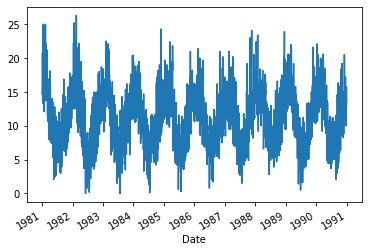

In [10]:
# create a line plot from pandas
df = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df.plot()
pyplot.show()

It can be helpful to compare line plots for the same interval, such as from day-to-day,
month-to-month, and year-to-year. The Minimum Daily Temperatures dataset spans 10
years. We can group data by year and create a line plot for each year for direct comparison. The example below shows how to do this. First the observations are grouped by year
(series.groupby(Grouper(freq='A'))).

In [11]:
# df.groupby(pd.Grouper(key="", freq="1W"))
# W: weekly frequency
# M: month end frequency
# B: business day frequency
# A, Y: year end frequency
df = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [12]:
groups = df.groupby(pd.Grouper(freq="A"))
groups.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1982-01-01    17.0
1982-01-02    15.0
1982-01-03    13.5
1982-01-04    15.2
1982-01-05    13.0
1983-01-01    18.4
1983-01-02    15.0
1983-01-03    10.9
1983-01-04    11.4
1983-01-05    14.8
1984-01-01    19.5
1984-01-02    17.1
1984-01-03    17.1
1984-01-04    12.0
1984-01-05    11.0
1985-01-01    13.3
1985-01-02    15.2
1985-01-03    13.1
1985-01-04    12.7
1985-01-05    14.6
1986-01-01    12.9
1986-01-02    13.8
1986-01-03    10.6
1986-01-04    12.6
1986-01-05    13.7
1987-01-01    12.3
1987-01-02    13.8
1987-01-03    15.3
1987-01-04    15.6
1987-01-05    16.2
1988-01-01    15.3
1988-01-02    14.3
1988-01-03    13.5
1988-01-04    15.0
1988-01-05    13.6
1989-01-01    14.3
1989-01-02    17.4
1989-01-03    18.5
1989-01-04    16.8
1989-01-05    11.5
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
Name: Temp, dtype: float64

In [13]:
years = pd.DataFrame()
for group, g_data in groups:
    years[group.year] = g_data.values

years.head()

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3


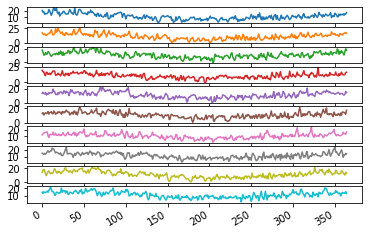

In [14]:
years.plot(subplots=True, legend=False)
pyplot.show()

### 2. Histogram and Density Plots

array([[<AxesSubplot:title={'center':'Temp'}>]], dtype=object)

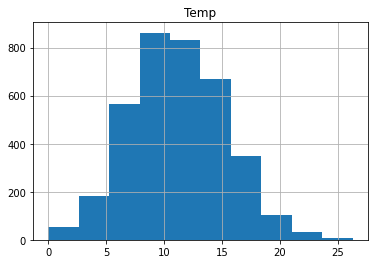

In [15]:
series = pd.read_csv('daily-min-temperatures.csv')
series.hist()

<AxesSubplot:ylabel='Density'>

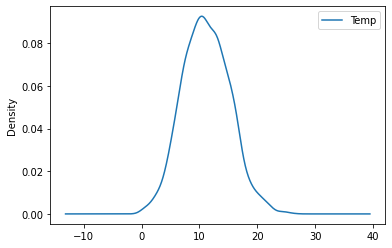

In [16]:
series.plot(kind='kde')

### 3. Box and Whisker Plots by Interval

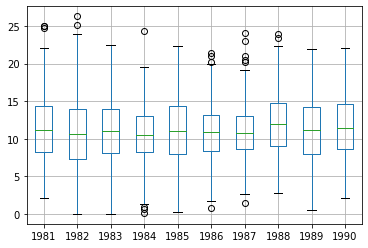

In [17]:
groups = df.groupby(pd.Grouper(freq="A"))
years = pd.DataFrame()

for group, g_data in groups:
    years[group.year] = g_data.values

years.boxplot()
pyplot.show()

We may also be interested in the distribution of values across months within a year. The
example below creates 12 box and whisker plots, one for each month of 1990, the last year in the
dataset. In the example, rst, only observations from 1990 are extracted. Then, the observations
are grouped by month, and each month is added to a new DataFrame as a column. Finally, a
box and whisker plot is created for each month-column in the newly constructed DataFrame.

In [19]:
df_year1990 = df['1990']
df_year1990.head()

Date
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
Name: Temp, dtype: float64

In [26]:
g_MonthsOf1990 = df_year1990.groupby(pd.Grouper(freq="M"))
g_MonthsOf1990.head()

Date
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
1990-02-01    12.0
1990-02-02    12.2
1990-02-03    14.8
1990-02-04    14.8
1990-02-05    14.4
1990-03-01    19.3
1990-03-02    17.3
1990-03-03    19.0
1990-03-04    19.8
1990-03-05    19.3
1990-04-01    15.3
1990-04-02    14.7
1990-04-03    11.0
1990-04-04    12.2
1990-04-05    14.2
1990-05-01    13.0
1990-05-02    13.9
1990-05-03    12.6
1990-05-04    14.3
1990-05-05    16.0
1990-06-01     9.7
1990-06-02     8.2
1990-06-03     8.4
1990-06-04     8.5
1990-06-05    10.4
1990-07-01     7.4
1990-07-02     7.3
1990-07-03     7.7
1990-07-04     7.7
1990-07-05     9.3
1990-08-01     6.8
1990-08-02     9.8
1990-08-03     5.7
1990-08-04     8.6
1990-08-05    10.6
1990-09-01     6.0
1990-09-02     9.5
1990-09-03     8.6
1990-09-04     7.6
1990-09-05    10.4
1990-10-01    11.3
1990-10-02    10.5
1990-10-03     9.9
1990-10-04    11.0
1990-10-05    14.0
1990-11-01    15.4
1990-11-02    11.8
1990-11

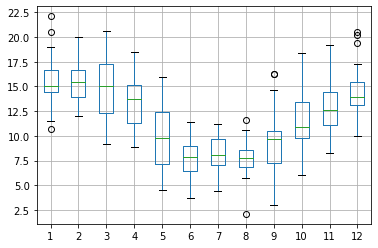

In [39]:
months = pd.DataFrame()
for group, g_data in g_MonthsOf1990:
    months[group.month] = pd.Series(g_data.values)
    
months.boxplot()
pyplot.show()

In [ ]:
Another way to do that is to combines these series

<AxesSubplot:>

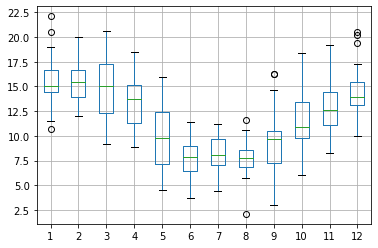

In [45]:
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0,parse_dates=True, squeeze=True)
one_year = series['1990']

groups = one_year.groupby(pd.Grouper(freq='M'))

months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()

Running the example creates 12 box and whisker plots, showing the significant change in distribution of minimum temperatures across the months of the year from the Southern Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year, and back to summer again.

### 4. Heat Maps

In [46]:
# create a heat map of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


In [47]:
years = years.T
years

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
1981,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,...,15.0,12.8,15.0,14.2,14.0,15.5,13.3,15.6,15.2,17.4
1982,17.0,15.0,13.5,15.2,13.0,12.5,14.1,14.8,16.2,15.8,...,10.8,15.6,15.3,13.9,13.0,15.3,16.3,15.8,17.7,16.3
1983,18.4,15.0,10.9,11.4,14.8,12.1,12.8,16.2,15.5,13.0,...,12.2,16.7,13.8,17.5,15.0,13.9,11.1,16.1,20.4,18.0
1984,19.5,17.1,17.1,12.0,11.0,16.3,16.1,13.0,13.4,15.2,...,14.2,11.4,13.7,16.5,12.8,12.2,12.0,12.6,16.0,16.4
1985,13.3,15.2,13.1,12.7,14.6,11.0,13.2,12.2,14.4,13.7,...,13.7,12.0,13.1,13.2,13.3,11.5,10.8,12.0,16.3,14.4
1986,12.9,13.8,10.6,12.6,13.7,12.6,13.1,15.4,11.9,13.8,...,11.6,9.7,13.4,10.5,14.7,14.6,14.2,13.2,11.7,17.2
1987,12.3,13.8,15.3,15.6,16.2,16.3,16.8,11.0,8.5,13.2,...,11.2,11.4,11.2,12.1,12.7,16.2,14.2,14.3,13.3,16.7
1988,15.3,14.3,13.5,15.0,13.6,15.2,17.0,18.7,16.5,17.4,...,11.9,15.2,17.3,19.8,15.8,9.5,12.9,12.9,14.8,14.1
1989,14.3,17.4,18.5,16.8,11.5,9.5,12.2,15.7,16.3,13.6,...,11.8,12.0,12.7,16.4,16.0,13.3,11.7,10.4,14.4,12.7
1990,14.8,13.3,15.6,14.5,14.3,15.3,16.4,14.8,17.4,18.8,...,13.2,13.9,10.0,12.9,14.6,14.0,13.6,13.5,15.7,13.0


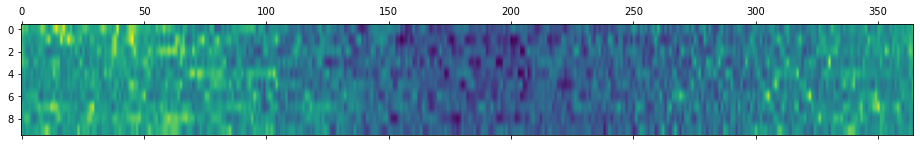

In [48]:
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

In [52]:
# Filter temperature data of the year of 1990
df_year1990 = df['1990']
df_year1990.head()

Date
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
Name: Temp, dtype: float64

In [53]:
g_MonthsOf1990 = df_1990.groupby(pd.Grouper(freq="M"))
g_MonthsOf1990.head()

Date
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
1990-02-01    12.0
1990-02-02    12.2
1990-02-03    14.8
1990-02-04    14.8
1990-02-05    14.4
1990-03-01    19.3
1990-03-02    17.3
1990-03-03    19.0
1990-03-04    19.8
1990-03-05    19.3
1990-04-01    15.3
1990-04-02    14.7
1990-04-03    11.0
1990-04-04    12.2
1990-04-05    14.2
1990-05-01    13.0
1990-05-02    13.9
1990-05-03    12.6
1990-05-04    14.3
1990-05-05    16.0
1990-06-01     9.7
1990-06-02     8.2
1990-06-03     8.4
1990-06-04     8.5
1990-06-05    10.4
1990-07-01     7.4
1990-07-02     7.3
1990-07-03     7.7
1990-07-04     7.7
1990-07-05     9.3
1990-08-01     6.8
1990-08-02     9.8
1990-08-03     5.7
1990-08-04     8.6
1990-08-05    10.6
1990-09-01     6.0
1990-09-02     9.5
1990-09-03     8.6
1990-09-04     7.6
1990-09-05    10.4
1990-10-01    11.3
1990-10-02    10.5
1990-10-03     9.9
1990-10-04    11.0
1990-10-05    14.0
1990-11-01    15.4
1990-11-02    11.8
1990-11

In [60]:
months = pd.DataFrame()
for group, g_data in g_MonthsOf1990:
    months[group.month] = pd.Series(g_data.values)
   
months.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5


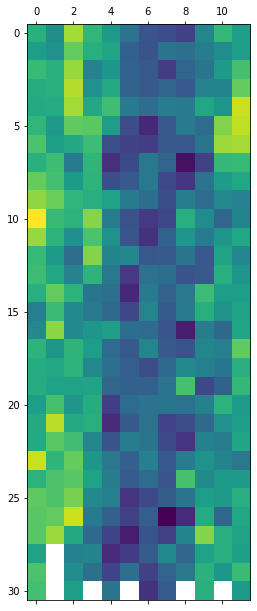

In [61]:
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

### 5. Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag=2, and so on. A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the observation at the next time step (t+1) on the y-axis.
+ If the points cluster along a diagonal line from the bottom-left to the top-right of the plot,
it suggests a positive correlation relationship.
+ If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests
a negative correlation relationship.
+ Either relationship is good as they can be modeled.
More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no  relationship. Below is an example of a lag plot for the Minimum Daily Temperatures dataset

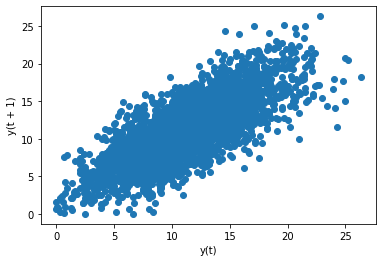

In [63]:
pd.plotting.lag_plot(df)
pyplot.show()

Notes:
- Lag plot is useful to plot outliers.
- In this model, it suggests a positive correlation relationship.

In [ ]:
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
    
dataframe = concat(columns, axis=1)

columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
    
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

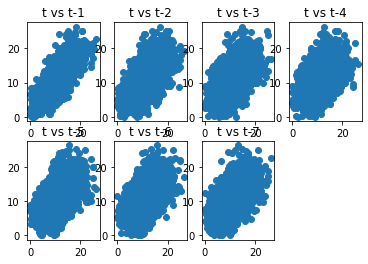

In [101]:
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# convert from Series to DataFrame
values = DataFrame(series.values)

lags = 7
# create new list with only one element - values
lst_Temp = [values]

for i in range(1,(lags + 1)): # loop through 1 to 7
    # add new element to the list
    lst_Temp.append(values.shift(i))
    
# Call concat and pass param axis=1 to concatenate column-wise
# The first arguments is a list to concatenate. Now, we have a list of eight elements.
dataframe = pd.concat(lst_Temp, axis=1)

# create column headers like this
# ['t', 't-1', 't-2', 't-3', 't-4', 't-5', 't-6']
columns = ['t']
for i in range(1, lags+1):
    columns.append('t-'+str(i))
dataframe.columns = columns

for i in range(1,(lags + 1)): # loop through 1 to 7
    # Add a subplot to the current figure.
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

### 6. Autocorrelation Plots

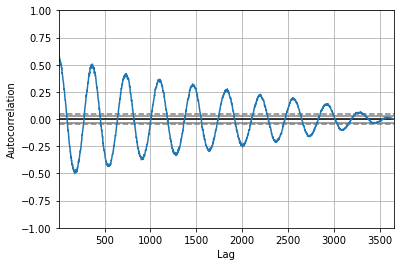

In [102]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
pyplot.show()